In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv');

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])   # Male=1, Female=0

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# B

In [13]:
print("Train-Test Split is not applicable for Clustering (Unsupervised Learning).")
print("Data preparation done using feature selection + scaling.")


Train-Test Split is not applicable for Clustering (Unsupervised Learning).
Data preparation done using feature selection + scaling.


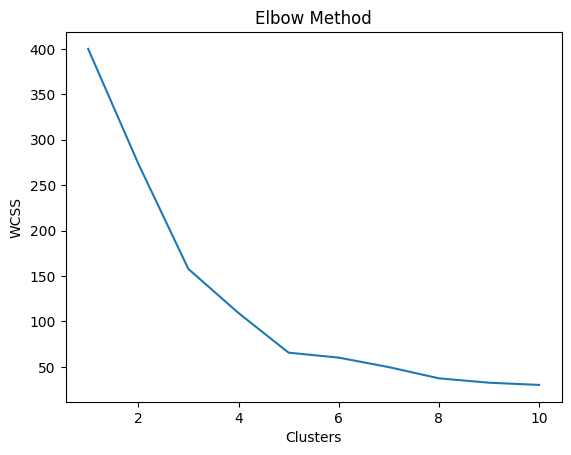

In [14]:
# K means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()


In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans Cluster'] = kmeans_labels


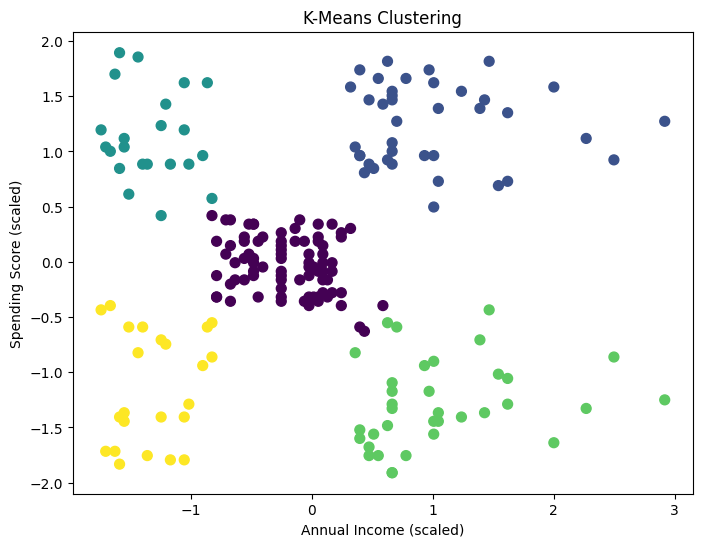

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()


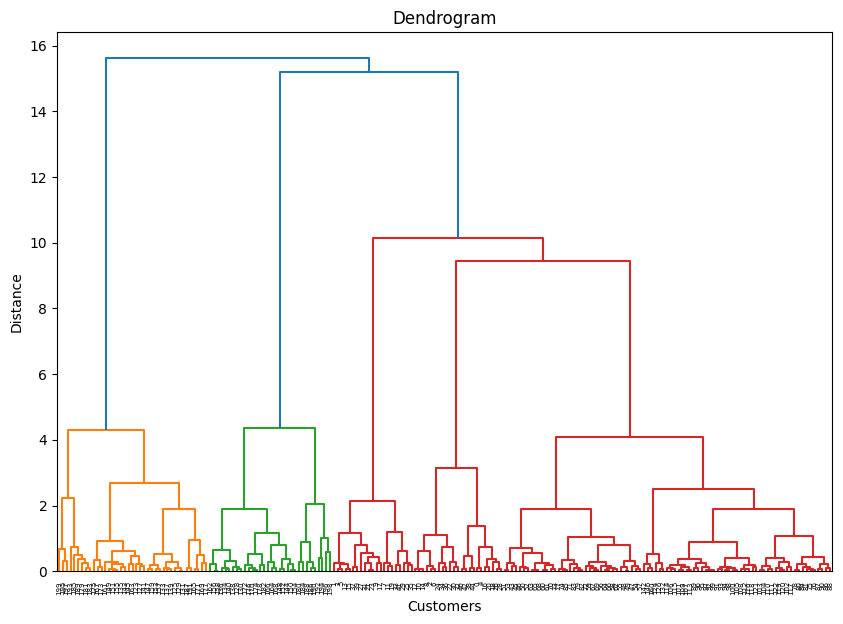

In [17]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dend = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [20]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)
hc_labels = hc.fit_predict(X_scaled)

df['Hierarchical Cluster'] = hc_labels


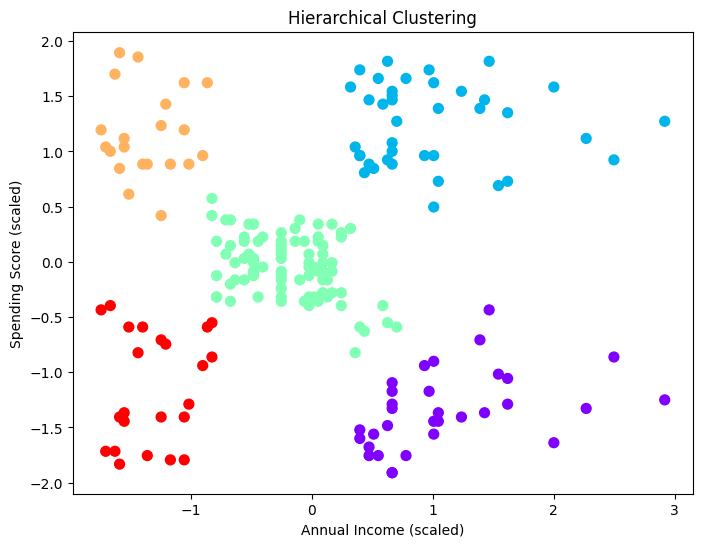

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()
